<a href="https://colab.research.google.com/github/LeeTunMT/python/blob/main/DS2024_Lab4_22280083_LeTuanMinhThanh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing:

In [2]:
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/LeeTunMT/python/main/College.csv')

In [4]:
data


,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [5]:
# Delete first column with a string data type
data.drop(columns=data.columns[0], axis=1,  inplace=True)

In [6]:
# Convert data type of column 'private' in Data to float64 with mapping values from 'Yes' to 1.0 and 'No' to 0.0
data['Private'] = data['Private'].replace({'Yes': 1, 'No': 0}).astype('float64')

In [7]:
data.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,1.0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,1.0,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,1.0,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,1.0,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,1.0,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [8]:
# Explore the dataset to understand its structure, feature types, and basic statistics
print("Dataset structure:")
print(data.info())

print("\nBasic statistics:")
print(data.describe())

Dataset structure:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    float64
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(2), int64(16)
memory

In [9]:
#check missing values
data.isna().any()*100

Private        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

-> This dataset has no missing values

In [85]:
X = data.values[:, 1:]
y = data.values[:, 0]

In [86]:
X = np.array(X)
##y = np.array(y)

# Implement the KMeans clustering algorithm from scratch using Numpy:

In [83]:
import numpy as np
import pandas as pd
from sklearn.metrics import pairwise_distances_argmin

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

class My_KMeans:
    def __init__(self, k = 3, con_tol=1e-4, max_iter=1000):
        self.k = k
        self.con_tol = con_tol
        self.max_iter = max_iter

        self.cluster_centers_ = None
        self.labels_ = None
        self.n_iter_ = 0
        self.inertia_ = 0

    def __initialize_centroids(self, X):
      ids = np.random.permutation(X.shape[0])
      centroids = X[ids[:self.k]]
      return centroids

    def _closest_centroid(self, sample, centroids):
        # distance of the current sample to each centroid
        distances = [euclidean_distance(sample, point) for point in centroids]
        closest_idx = np.argmin(distances)
        return closest_idx

    def _create_clusters(self, centroids):
        # assign the samples to the closest centroids
        clusters = [[] for _ in range(self.k)]
        for idx, sample in enumerate(self.X):
            centroid_idx = self._closest_centroid(sample, centroids)
            clusters[centroid_idx].append(idx)
        return clusters

    def get_labels(self, clusters):
        # each sample will get the label of the cluster it was assigned to
        labels = np.empty(self.n_samples)
        for cluster_idx, cluster in enumerate(clusters):
            for sample_idx in cluster:
                labels[sample_idx] = cluster_idx
        return labels

    #update centroids
    def __update_centroids(self, clusters):
        centroids = np.zeros((self.k, self.n_features))
        for cluster_idx, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[cluster_idx] = cluster_mean
        return centroids


    def _is_converged(self, centroids_old, centroids):
        # distances between old and new centroids, for all centroids
        distances = [euclidean_distance(centroids_old[i], centroids[i]) for i in range(self.k)]
        return sum(distances) == 0

    def fit(self, X):
        self.n_samples, self.n_features = X.shape
        self.X = X
        self.labels_ = np.zeros(self.n_samples)
        self.inertia_ = 0
        # Initialize centroids
        centroids = self.__initialize_centroids(X)
        for _ in range(self.max_iter):
            centroids_old = centroids
            clusters = self._create_clusters(centroids)
            centroids = self.__update_centroids(clusters)
            if self._is_converged(centroids_old, centroids):
                break
            # Get labels for each sample
            self.labels_ = self.get_labels(clusters)
            # Update number of iterations
            self.n_iter_ += 1
        self.cluster_centers_ = centroids

    def transform(self, X):
        # Initialize an array to store distances of samples to centroids
        distances = np.zeros((X.shape[0], self.k))
        # Calculate the distance from each sample to each centroid
        for i, sample in enumerate(X):
            for j, centroid in enumerate(self.cluster_centers_):
                distances[i][j] = euclidean_distance(sample, centroid)
        return distances


    def predict(self, X):
        predicted_labels = np.zeros(X.shape[0])
        for idx, sample in enumerate(X):
            # Assign the closest centroid to each sample
            predicted_labels[idx] = self._closest_centroid(sample, self.cluster_centers_)
        return predicted_labels

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)

    def fit_predict(self, X):
        self.fit(X)
        return self.predict(X)

    def plot(self):
        fig, ax = plt.subplots(figsize=(12, 8))

        for i, index in enumerate(self.clusters):
            point = self.X[index].T
            ax.scatter(*point)

        for point in self.centroids:
            ax.scatter(*point, marker="x", color="black", linewidth=2)

        plt.show()

In [87]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 54)

In [88]:
import random
random.seed(1)
km = My_KMeans(k = 3, con_tol = 0.01, max_iter = 1000)

In [89]:
X_scl = km.fit_transform(X_train)
y_train_pred = km.predict(X_train)

# Testing and Validation:

In [90]:
y_pred = km.predict(X_test)
y_pred

array([1., 2., 2., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 2., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1.,
       2., 1., 1., 1., 2., 2., 1., 0., 1., 2., 0., 1., 0., 1., 1., 1., 0.,
       1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 2., 1., 0., 1., 1., 0.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 2., 2., 2., 1.,
       1., 1., 2., 1., 1., 0., 1., 2., 1., 1., 1., 0., 2., 1., 2., 1., 1.,
       1., 1., 2., 1., 0., 1., 0., 2., 1., 1., 0., 0., 1., 1., 2., 1., 1.,
       1., 0., 1.])

### Validate the correctness of my implementation by comparing results with sklearn's KMeans implementation.


In [92]:
from sklearn.cluster import KMeans
km_lib = KMeans(n_clusters = 3)
km_lib.fit_transform(X_train)
km_lib.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2,
       2, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 2, 2, 1, 2, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 2, 0, 2, 1, 2, 2, 2, 0, 1,
       2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 1, 2, 2, 0, 0, 2, 2, 1, 2, 2, 2,
       0, 2], dtype=int32)

Distance between cluster centroids: [12849.40034717     0.         12849.40034717]
Homogeneity of My_KMeans: 0.34082148999752215
Homogeneity of sklearn's KMeans: 0.3245654601115065
Silhouette of My_KMeans: 0.4851257737046943
Silhouette of sklearn's KMeans: 0.48612868224701944


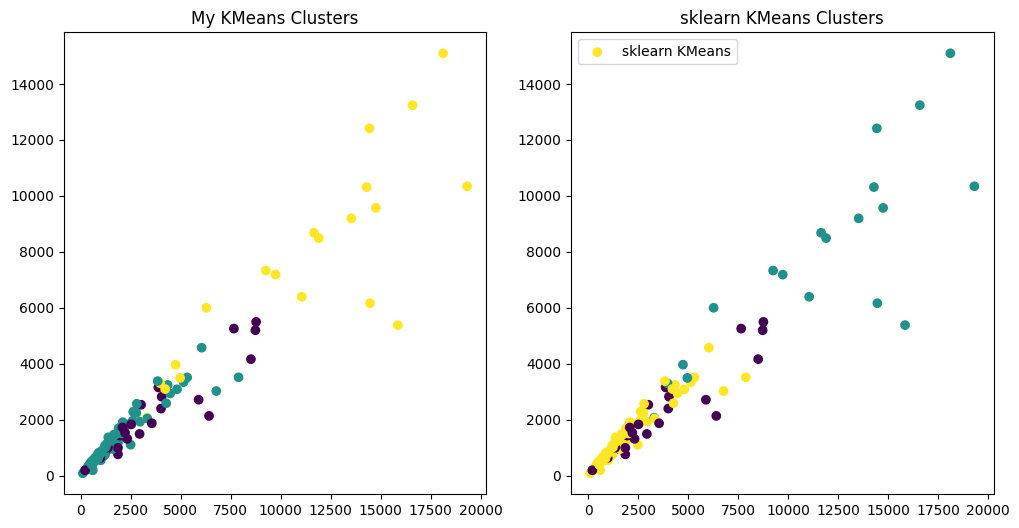

In [98]:
from sklearn.metrics import homogeneity_score, silhouette_score

#Compare centroid clusters
centroids_my_kmeans = km.cluster_centers_
centroids_sklearn = km_lib.cluster_centers_

# Calculate the Euclidean distance between cluster centroids
centroid_distances = np.sqrt(np.sum((centroids_my_kmeans - centroids_sklearn)**2, axis=1))
print("Distance between cluster centroids:", centroid_distances)

# Calculate the homogeneity
homogeneity_my_kmeans = homogeneity_score(y_test, y_pred)
homogeneity_sklearn = homogeneity_score(y_test, km_lib.predict(X_test))
print("Homogeneity of My_KMeans:", homogeneity_my_kmeans)
print("Homogeneity of sklearn's KMeans:", homogeneity_sklearn)

# Calculate the silhouette
silhouette_my_kmeans = silhouette_score(X_test, y_pred)
silhouette_sklearn = silhouette_score(X_test, km_lib.predict(X_test))
print("Silhouette of My_KMeans:", silhouette_my_kmeans)
print("Silhouette of sklearn's KMeans:", silhouette_sklearn)

# Biểu đồ Scatter
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', label='My_KMeans')
plt.title('My KMeans Clusters')

plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=km_lib.predict(X_test), cmap='viridis', label='sklearn KMeans')
plt.title('sklearn KMeans Clusters')

plt.legend()
plt.show()


My implementation seems to work similarly to sklearn's KMeans based on homogeneity and silhouette metrics, but may need to reconsider how cluster centroids are initialized and updated to account for large differences in location cluster centroid.

## Creating the scree plot for Intertia - elbow method


In [ ]:
import math
no_of_clusters = range(2, math.floor(math.sqrt(X_scl.shape[0])))
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_scl)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

Text(0.5, 1.0, 'Inertia Plot per k')

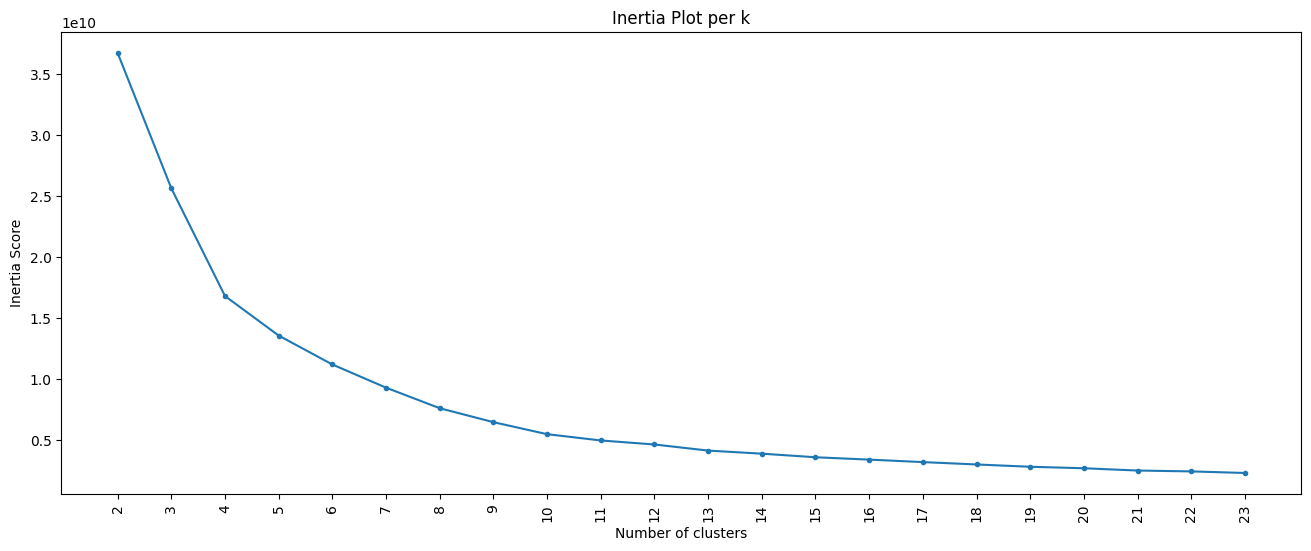

In [69]:
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia, marker = '.', linestyle = '-')
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
plt.title("Inertia Plot per k")

With the chart above using the elbow method, we can see that 4 centroids is optimal for K-Means

## Silhouette score

In [ ]:
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, math.floor(math.sqrt(X_scl.shape[0])))
silhouette_avg = []

for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X_scl)
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg.append(silhouette_score(X_scl, cluster_labels))


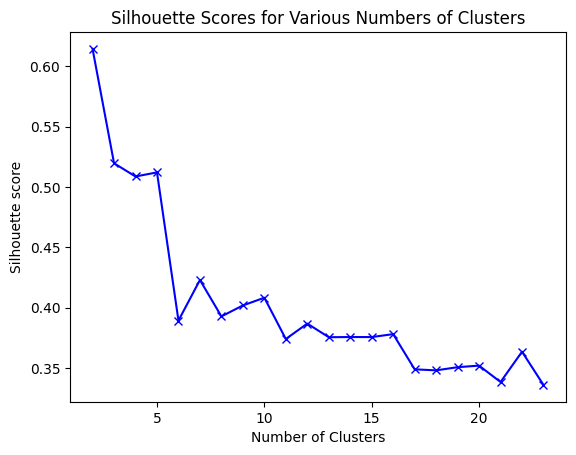

In [71]:
# Plotting the silhouette scores
plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.show()


# Analysis and Interpretation:

In [55]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [61]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(X_scl)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

In [ ]:
max_iterations = 10000
centroid_count = 4

centroids = ramdom_centroids(X_scl, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(X_scl, centroids)
    centroids = new_centroids(X_scl, labels, centroid_count)
    plot_clusters(X_scl, labels, centroids, iteration)
    iteration += 1

#Report and Conclusion
